#CSE 353 Fall 2021 Homework 6 Jeongyoon Lee(114133199)

In [1]:
import cv2
import numpy as  np
import matplotlib.pyplot as plt
from google.colab import drive
import glob
import math
import pandas as pd
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from cvxopt import solvers, matrix

---(a) Implement and apply the linear support vector machine---
>>>Find H, Phi, A, c and q

H
[ 0.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00  1.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00  1.00e+00]

Phi
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]

A
[ 1.00e+00  3.50e-01  8.30e-01]
[-1.00e+00 -5.90e-01 -5.50e-01]
[-1.00e+00 -9.20e-01 -2.90e-01]
[-1.00e+00 -7.60e-01 -7.50e-01]
[ 1.00e+00  3.80e-01  5.70e-01]
[-1.00e+00 -8.00e-02 -5.00e-02]
[ 1.00e+00  5.30e-01  7.80e-01]
[-1.00e+00 -9.30e-01 -1.30e-01]
[-1.00e+00 -5.70e-01 -4.70e-01]
[ 1.00e+00  1.00e-02  3.40e-01]
[ 1.00e+00  1.60e-01  7.90e-01]
[ 1.00e+00  3.10e-01  5.30e-01]
[ 1.00e+00  1.70e-01  6.00e-01]
[ 1.00e+00  2.60e-01  6.50e-01]
[ 1.00e+00  6.90e-01  7.50e-01]
[-1.00e+00 -4.50e-01 -8.00e-02]
[ 1.00e+00  2.30e-01  9.10e-01]
[ 1.00e+00  1.50e-01  8.30e-01]
[ 1.00e+00  5.40e-01  1.00e+00]
[ 1.00e+00  8.00e-02  4.40e-01]

c
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1

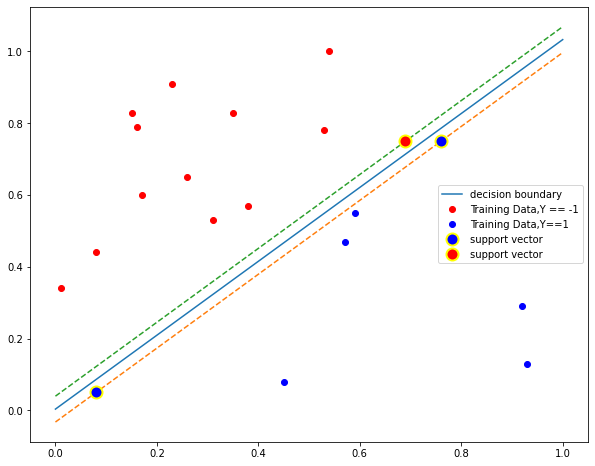

In [2]:
for f in glob.glob( "X_LinearSeparable.txt"):
  X = np.loadtxt(f,delimiter=",") # [2*20]

for f in glob.glob( "Y_LinearSeparable.txt"):
  Y = np.loadtxt(f,delimiter=",") # [1*20]
  
#find H, Phi, A, c
print("---(a) Implement and apply the linear support vector machine---")
print(">>>Find H, Phi, A, c and q")
print()

d = 2
N = len(Y)
H = np.eye(d+1)
H[0][0] = 0
Phi = np.zeros(d+1)
c = np.ones(N) * -1

A = X * Y
A = np.append(A, [A[1]], axis = 0)
A[1] = A[0]
A[0] = Y
A = A * (-1)

H = matrix(H)
Phi = matrix(Phi)
A = matrix(A.T)
c = matrix(c)

print("H")
print(H)
print("Phi")
print(Phi)
print("A")
print(A)
print("c")
print(c)

# sol1 = solvers.qp(P = H, q = Phi, G = A, h=c)
sol1 = solvers.qp( H, Phi, A, c)
# print(sol1)
print()
print("q")
print(sol1['x'])
W = [sol1['x'][1],sol1['x'][2]]
b = sol1['x'][0]

def print_plot(W,b):
  if(W[1] == 0):
    print("Cannot find decision boundary since W2 == 0")
    return 
  # set plot size
  f = plt.figure()
  f.set_figwidth(10)
  f.set_figheight(8)

  # flag for legend
  c1 = 0 
  c2 = 0 
  c3 = 0
  c4 = 0

  plt.scatter
  ax = plt.gca()
  Wx = ax.get_xlim()
  Wm = W[0]/W[1]
  Wy = [((-1)*Wm*num)-b/W[1] for num in Wx]  
  plt.plot(Wx, Wy, label = 'decision boundary')

  # unused calculated b_new (we assume distance already)
  # b_new = np.linalg.norm(W)
  # b_new = 1/b_new
  # b_new = b_new*np.sqrt((Wm **2 +1)) 
  # print(b_new)

  # Wy = [((-1)*Wm*num)-b/W[1]-(b_new) for num in Wx]  
  Wy = [((-1)*Wm*num)+(1-b)/W[1] for num in Wx]  
  plt.plot(Wx, Wy, linestyle = 'dashed')

  # Wy = [((-1)*Wm*num)-b/W[1]+b_new for num in Wx]  
  Wy = [((-1)*Wm*num)+(-1-b)/W[1] for num in Wx]  
  plt.plot(Wx, Wy, linestyle = 'dashed')

  print('----- (b) Support vectors -----')
  max_margin = 0
  max_margin_index = -1
  for i in range(len(Y)):
    if(Y[i] == 1):
      if(c1 == 0):
        c1=1
        plt.plot(X[0][i], X[1][i], 'o', color='blue', label = 'Training Data,Y==1')
      else:
        plt.plot(X[0][i], X[1][i], 'o', color='blue')
    else:
      if(c2 ==0):
        c2 =1
        plt.plot(X[0][i], X[1][i], 'o', color='red', label = 'Training Data,Y == -1')
      else:
        plt.plot(X[0][i], X[1][i], 'o', color='red')
    flag = (Y[i] * ((W[0] * X[0][i]+W[1] * X[1][i]) + b))
    if((flag<1.01) and (flag>0.99)) :
      print(">>> x :(",X[0][i] ,",", X[1][i], ') y:',Y[i])
      n = (Y[i] * (W[0] * X[0][i]+W[1] * X[1][i]+b))/np.linalg.norm(W)
      print(">>> margin: ",n)
      print()
      if(n > max_margin ):
        max_margin = n
        max_margin_index = i
      if(Y[i] == 1):
        if(c3 == 0):
          c3 = 1
          plt.plot(X[0][i], X[1][i], 'o', markersize = 12, mec='yellow', mfc = 'blue',mew = 2, label = 'support vector')
        else:
          plt.plot(X[0][i], X[1][i], 'o', markersize = 12, mec='yellow', mfc = 'blue',mew = 2)
      else:
        if(c4 == 0):
          c4 = 1
          plt.plot(X[0][i], X[1][i], 'o', markersize = 12, mec='yellow', mfc = 'red',mew = 2, label = 'support vector')
        else:
          plt.plot(X[0][i], X[1][i], 'o', markersize = 12, mec='yellow', mfc = 'red',mew = 2)
  print("----- (c) Largest Margin ----- ")
  print("x :(",X[0][max_margin_index] ,",", X[1][max_margin_index], ') y:',Y[max_margin_index])
  print("largest margin : " , max_margin)
  print()
  margin_through_w = np.linalg.norm(W)
  margin_through_w = 1/margin_through_w
  print("margin through W : " , margin_through_w)
  print()
  print("----- (d) Show plot -----")
  plt.legend(loc = 0)
  plt.show(); 
  return
print_plot(W,b)
